#**Computer Vision Project- Botanical Research**


# 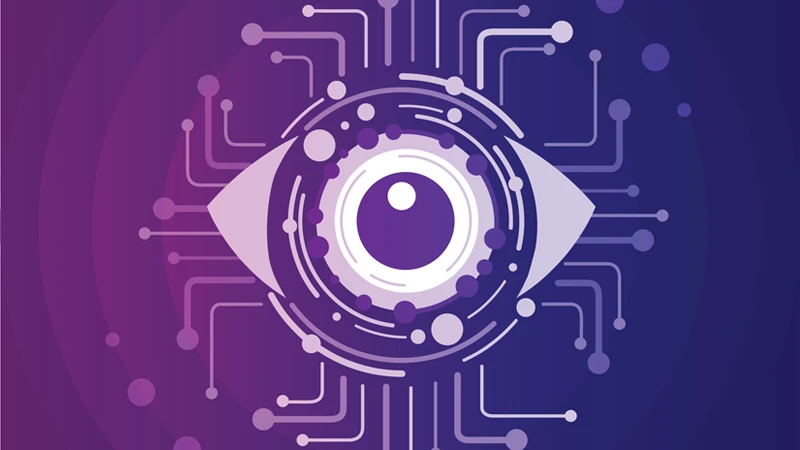

**Part A - 30 Marks**

**DOMAIN**: Botanical Research

• **CONTEXT**: University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at
various stages of growth. They already have have invested on curating sample images. They require an automation which can create a
classifier capable of determining a plant's species from a photo.

**• DATA DESCRIPTION**: The dataset comprises of images from 12 plant species.
Source: https://www.kaggle.com/c/plant-seedlings-classification/data

**• PROJECT OBJECTIVE:** To create a classifier capable of determining a plant's species from a photo

________________________________________________________________________________

**1. Import and Understand the data [12 Marks]**

  A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]
  Hint: You can extract it Manually by losing 2 marks.

  B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]
  Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..

  C. Write a function that will select n random images and display images along with its species. [4 Marks]
  Hint: If input for function is 5, it should print 5 random images along with its labels.

________________________________________________________________________________

**A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab_Notebooks/Neural_Network/Project_2"

 Computer_Vision_Project.ipynb	      oxflower17.npz			        train.zip
'CV 1- Problem_Statement-1 (6).pdf'  'plant-seedlings-classification (5).zip'


In [ ]:
zip_path = r"/content/drive/My Drive/Colab_Notebooks/Neural_Network/Project_2/plant-seedlings-classification (5).zip"

In [ ]:
import os

if os.path.exists(zip_path):
    print("✅ File found, proceeding with extraction...")
else:
    print("❌ File not found! Double-check the path.")


✅ File found, proceeding with extraction...


In [ ]:
import zipfile
import os

# Define the paths
zip_path = r"/content/drive/My Drive/Colab_Notebooks/Neural_Network/Project_2/plant-seedlings-classification (5).zip"
extract_folder = "/content/unzipped"  # Destination folder for extracted files

# Ensure the directory exists
os.makedirs(extract_folder, exist_ok=True)

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"✅ Extraction completed! Files are now in: {extract_folder}")


✅ Extraction completed! Files are now in: /content/unzipped


In [ ]:
!ls "/content/unzipped/"


__MACOSX  plant-seedlings-classification


________________________________________________________________________________

**B. Map the images from train folder with train labels to form a DataFrame.**

In [ ]:
!ls "/content/drive/My Drive/Colab_Notebooks/Neural_Network/Project_2"


 Computer_Vision_Project.ipynb	      oxflower17.npz			        train.zip
'CV 1- Problem_Statement-1 (6).pdf'  'plant-seedlings-classification (5).zip'


In [ ]:
zip_path_2 = r"/content/drive/My Drive/Colab_Notebooks/Neural_Network/Project_2/train.zip"

In [ ]:
import os

if os.path.exists(zip_path_2):
    print("✅ File found, proceeding with extraction...")
else:
    print("❌ File not found! Double-check the path.")

✅ File found, proceeding with extraction...


In [ ]:
import zipfile
import os

# Define the paths
zip_path_2 = r"/content/drive/My Drive/Colab_Notebooks/Neural_Network/Project_2/train.zip"
extract_folder = "/content/unzipped/plant-seedlings-classification"  # Destination folder for extracted files

# Ensure the directory exists
os.makedirs(extract_folder, exist_ok=True)

# Extract ZIP file
with zipfile.ZipFile(zip_path_2, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"✅ Extraction completed! Files are now in: {extract_folder}")

✅ Extraction completed! Files are now in: /content/unzipped/plant-seedlings-classification


In [ ]:
!ls "/content/unzipped/plant-seedlings-classification"


 Black-grass	    'Fat Hen'			     'Scentless Mayweed'
 Charlock	    'Loose Silky-bent'		     'Shepherds Purse'
 Cleavers	     __MACOSX			     'Small-flowered Cranesbill'
'Common Chickweed'   Maize			     'Sugar beet'
'Common wheat'	     plant-seedlings-classification   train


In [ ]:
train_dir = "/content/unzipped/plant-seedlings-classification/train"


In [ ]:
import os
import pandas as pd
import cv2

# Initialize lists to store data
image_names = []
labels = []
image_data = []

# Loop through each species/class folder
for label in sorted(os.listdir(train_dir)):  # Sorting ensures order
    label_folder = os.path.join(train_dir, label)

    # Ensure it's a directory
    if os.path.isdir(label_folder):
        for file in os.listdir(label_folder):
            file_path = os.path.join(label_folder, file)

            # Read the image
            img = cv2.imread(file_path)
            if img is not None:  # Check if image was loaded correctly
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

                # Append data
                image_names.append(file)  # Image file name
                labels.append(label)  # Class/Species name
                image_data.append(img)  # Image array

# Create a DataFrame
df = pd.DataFrame({
    "Name of Image": image_names,
    "Species/Class": labels,
    "Actual Image": image_data
})

print(f"✅ DataFrame created with {len(df)} images.")


✅ DataFrame created with 4750 images.


In [ ]:
import pandas as pd

print(df.head())  # Display the first few rows of the DataFrame

   Name of Image Species/Class  \
0  d3e69adad.png   Black-grass   
1  3de7650a2.png   Black-grass   
2  7050b0b8a.png   Black-grass   
3  af1b91028.png   Black-grass   
4  4a7e7eba8.png   Black-grass   

                                        Actual Image  
0  [[[74, 63, 56], [73, 62, 56], [72, 62, 56], [7...  
1  [[[94, 78, 51], [94, 78, 52], [96, 79, 55], [9...  
2  [[[79, 76, 42], [77, 75, 41], [73, 73, 37], [7...  
3  [[[141, 139, 139], [138, 135, 135], [134, 131,...  
4  [[[137, 136, 138], [137, 136, 139], [134, 133,...  


In [ ]:
print(df.columns)


Index(['Name of Image', 'Species/Class', 'Actual Image'], dtype='object')


In [ ]:
df.rename(columns={"Species/Class": "Species_Class"}, inplace=True)


In [ ]:
print(df.columns)


Index(['Name of Image', 'Species/Class', 'Actual Image'], dtype='object')


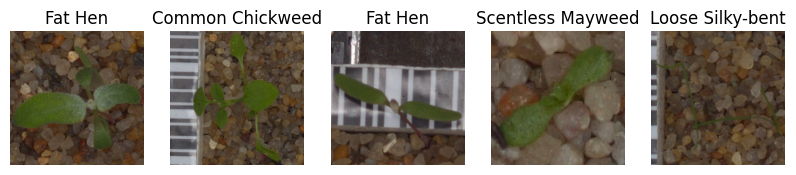

In [ ]:
import matplotlib.pyplot as plt
import random

# Select random samples
sample_df = df.sample(5)

# Display images
plt.figure(figsize=(10, 5))

for i, row in enumerate(sample_df.itertuples(index=False, name=None)):  # Returns tuple instead of named tuple
    plt.subplot(1, 5, i+1)
    plt.imshow(row[2])  # Access "Actual_Image" using index
    plt.title(row[1])   # Access "Species_Class" using index
    plt.axis("off")

plt.show()


________________________________________________________________________________

**C. Write a function that will select n random images and display images along with its species.**

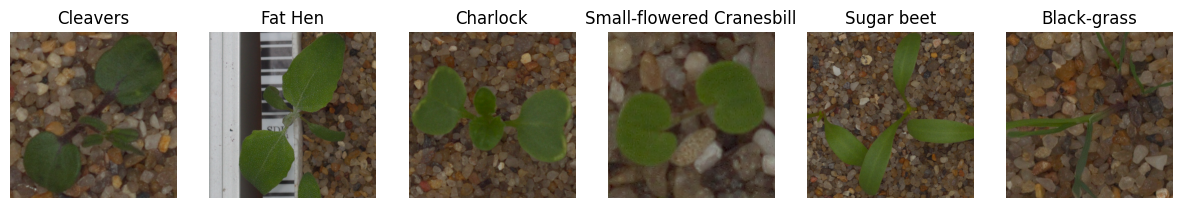

In [ ]:
import matplotlib.pyplot as plt

# Define function to display n random images with their species labels
def display_random_images(df, n=6):
    """
    Selects n random images from the DataFrame and displays them with species labels.

    Parameters:
        df (pd.DataFrame): The DataFrame containing image data.
        n (int): Number of random images to display.
    """
    # Ensure n is within valid limits
    n = min(n, len(df))

    # Select random samples
    sample_df = df.sample(n)

    # Create figure with the correct number of subplots
    fig, axes = plt.subplots(1, n, figsize=(15, 6))

    for i, (index, row) in enumerate(sample_df.iterrows()):
        axes[i].imshow(row["Actual_Image"])  # Access "Actual_Image" column
        axes[i].set_title(row["Species_Class"])  # Access "Species_Class" column
        axes[i].axis("off")

    plt.show()

# Example usage: Display 5 random images
display_random_images(df, n=6)

________________________________________________________________________________



##2. Data preprocessing [8 Marks]

**A. Create X & Y from the DataFrame.**

In [ ]:
import numpy as np
import cv2

# Define the target image size (128x128)
IMG_SIZE = (128, 128)

# Resize all images to the same shape
X = np.array([cv2.resize(img, IMG_SIZE) for img in df["Actual_Image"].tolist()])

# Convert labels into NumPy array
Y = np.array(df["Species_Class"].tolist())

print(f"✅ X (features) shape: {X.shape}")
print(f"✅ Y (labels) shape: {Y.shape}")


✅ X (features) shape: (4750, 128, 128, 3)
✅ Y (labels) shape: (4750,)


__________________________________________________________

**B. Encode labels of the images. [2 Marks]**

In [ ]:
import numpy as np

# Extract labels from DataFrame
Y = np.array(df["Species_Class"].tolist())

print(f"✅ Y (labels) successfully reloaded. Shape: {Y.shape}")


✅ Y (labels) successfully reloaded. Shape: (4750,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode labels (convert species names to numerical values)
Y_encoded = label_encoder.fit_transform(Y)

# Display unique labels and their encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(f"✅ Labels successfully encoded.")
print(f"🔹 Unique Classes: {label_encoder.classes_}")
print(f"🔹 Label Mapping: {label_mapping}")
print(f"✅ Y_encoded shape: {Y_encoded.shape}")


✅ Labels successfully encoded.
🔹 Unique Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
🔹 Label Mapping: {'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
✅ Y_encoded shape: (4750,)


________________________________________________________________________________

**C. Unify shape of all the images. [2 Marks]**

In [ ]:
import numpy as np
import cv2

# Define the target image size (128x128)
IMG_SIZE = (128, 128)

# Resize all images and store them in a list
X_resized = [cv2.resize(img, IMG_SIZE) for img in df["Actual_Image"].tolist()]

# Convert the list of resized images into a NumPy array
X = np.array(X_resized, dtype=np.float32)

print(f"✅ X (features) successfully reloaded. Shape: {X.shape}")


✅ X (features) successfully reloaded. Shape: (4750, 128, 128, 3)


________________________________________________________________________________

**D. Normalise all the images. [2 Marks]**

In [ ]:
# Normalize pixel values to range [0,1]
X_normalized = X / 255.0

print(f"✅ All images resized to {IMG_SIZE} and normalized.")
print(f"🔹 X_normalized shape: {X_normalized.shape}")


✅ All images resized to (128, 128) and normalized.
🔹 X_normalized shape: (4750, 128, 128, 3)


________________________________________________________________________________

##3. Model training [10 Marks]

Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.

**A. Split the data into train and test data. [2 Marks]**

In [ ]:
!ls "/content/unzipped/plant-seedlings-classification/"


__MACOSX  plant-seedlings-classification  train


In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Define the correct path to the train directory
train_dir = "/content/unzipped/plant-seedlings-classification/train"

# Initialize lists to store data
image_names = []
labels = []
image_data = []

# Check if the train directory exists before proceeding
if os.path.exists(train_dir):
    # Loop through each species/class folder
    for label in sorted(os.listdir(train_dir)):
        label_folder = os.path.join(train_dir, label)

        # Ensure it's a directory
        if os.path.isdir(label_folder):
            for file in os.listdir(label_folder):
                file_path = os.path.join(label_folder, file)

                # Read the image
                img = cv2.imread(file_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

                    # Append data
                    image_names.append(file)
                    labels.append(label)
                    image_data.append(img)

    # Create a DataFrame
    df = pd.DataFrame({
        "Name_of_Image": image_names,
        "Species_Class": labels,
        "Actual_Image": image_data
    })

    print(f"✅ DataFrame created with {len(df)} images.")

else:
    print("❌ Train directory not found. Please verify the path.")


✅ DataFrame created with 4750 images.


In [ ]:
# Define the target image size
IMG_SIZE = (128, 128)

# Resize images and convert to NumPy array
X_resized = [cv2.resize(img, IMG_SIZE) for img in df["Actual_Image"].tolist()]
X = np.array(X_resized, dtype=np.float32)

# Normalize pixel values to range [0,1]
X_normalized = X / 255.0

# Encode labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(df["Species_Class"].tolist())

# ✅ Check the shape of X before splitting
print(f"🔹 X_normalized shape before splitting: {X_normalized.shape}")

# ✅ Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_normalized, Y_encoded, test_size=0.2, random_state=42, stratify=Y_encoded
)

# ✅ Display the shapes of the train and test sets
print(f"✅ X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")


🔹 X_normalized shape before splitting: (4750, 128, 128, 3)
✅ X_train shape: (3800, 128, 128, 3), Y_train shape: (3800,)
✅ X_test shape: (950, 128, 128, 3), Y_test shape: (950,)


__________________________________________________________

**B. Create new CNN architecture to train the model. [4 Marks]**

In [ ]:
!pip install tensorflow


In [ ]:
# ✅ Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Step 2: Define the CNN Architecture
def create_cnn_model(input_shape, num_classes):
    """
    Creates a CNN model for plant species classification.

    Parameters:
        input_shape (tuple): Shape of the input image (height, width, channels)
        num_classes (int): Number of output classes (plant species)

    Returns:
        model (tf.keras.Model): Compiled CNN model
    """
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten the feature maps
        Flatten(),

        # Fully Connected Layer 1
        Dense(128, activation='relu'),
        Dropout(0.5),

        # Output Layer (Softmax Activation for Multi-Class Classification)
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# ✅ Step 3: Get Input Shape and Number of Classes
input_shape = X_train.shape[1:]  # (128, 128, 3)
num_classes = len(np.unique(Y_train))  # Unique plant species

# ✅ Step 4: Create the CNN Model
cnn_model = create_cnn_model(input_shape, num_classes)

# ✅ Step 5: Display the Model Summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289,228 (16.36 MB)

 Trainable params: 4,289,228 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

__________________________________________________________

**C. Train the model on train data and validate on test data. [2 Marks]**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Step 1: Define the CNN Architecture Again
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Step 2: Get Input Shape and Number of Classes
input_shape = X_train.shape[1:]  # (128, 128, 3)
num_classes = len(np.unique(Y_train))

# ✅ Step 3: Create the CNN Model Again
cnn_model = create_cnn_model(input_shape, num_classes)

# ✅ Step 4: Train the Model
EPOCHS = 10
BATCH_SIZE = 32

history = cnn_model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

# ✅ Step 5: Save the Trained Model
cnn_model.save("plant_classifier_model.h5")

print("✅ Model training completed!")


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.1952 - loss: 2.3600 - val_accuracy: 0.4063 - val_loss: 1.7560
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.4012 - loss: 1.7869 - val_accuracy: 0.5368 - val_loss: 1.3308
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.5066 - loss: 1.4357 - val_accuracy: 0.6347 - val_loss: 1.1169
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.5439 - loss: 1.2992 - val_accuracy: 0.6853 - val_loss: 0.9892
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.6119 - loss: 1.1304 - val_accuracy: 0.7011 - val_loss: 0.9639
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6293 - loss: 1.0496 - val_accuracy: 0.7295 - val_loss: 0.8448
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.6897 - loss: 0.9094 - val_accuracy: 0.7095 - val_loss: 0.8400
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.7007 - loss: 0.8618 - val_accu

✅ Model training completed!


In [ ]:
cnn_model.save("plant_classifier_model.keras")
print("✅ Model saved in .keras format successfully!")


✅ Model saved in .keras format successfully!


________________________________________________________________________________

**D. Select a random image and print actual label and predicted label for the same. [2 Marks]**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


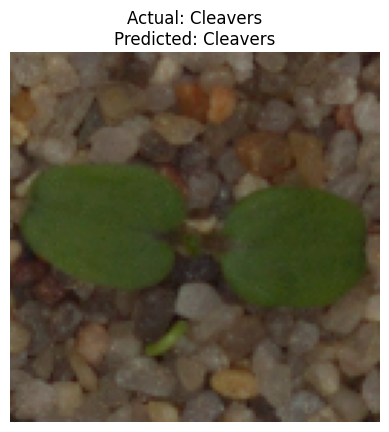

In [ ]:
import random
import matplotlib.pyplot as plt

# ✅ Select a Random Image from the Test Set
random_idx = random.randint(0, len(X_test) - 1)
random_image = X_test[random_idx]
actual_label = Y_test[random_idx]

# ✅ Predict the Label Using the Trained Model
predicted_label_idx = np.argmax(cnn_model.predict(np.expand_dims(random_image, axis=0)))  # Model expects batch input
predicted_label = label_encoder.inverse_transform([predicted_label_idx])[0]

# ✅ Display the Image with Actual & Predicted Labels
plt.imshow(random_image)
plt.title(f"Actual: {label_encoder.inverse_transform([actual_label])[0]}\nPredicted: {predicted_label}")
plt.axis("off")
plt.show()


**Evaluating the model further and improving accuracy using data augmentation.**

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_model.evaluate(X_test, Y_test, verbose=1)

print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 369ms/step - accuracy: 0.7595 - loss: 0.7405
✅ Test Accuracy: 77.16%
✅ Test Loss: 0.7222


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator for data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=30,  # Randomly rotate images by 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Apply shearing transformations
    zoom_range=0.2,  # Random zooming
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill missing pixels with nearest pixel values
)

# Apply augmentation only to training data
train_augmented = data_augmentation.flow(X_train, Y_train, batch_size=32)


In [ ]:
# Train the CNN model with augmented data
EPOCHS = 15  # Train for more epochs
BATCH_SIZE = 32

history_augmented = cnn_model.fit(
    train_augmented,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

# Save the new improved model
cnn_model.save("plant_classifier_model_augmented.keras")

print("✅ Model retrained with data augmentation!")


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


119/119 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.4554 - loss: 1.7059 - val_accuracy: 0.6926 - val_loss: 0.9291
Epoch 2/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.5034 - loss: 1.4300 - val_accuracy: 0.6863 - val_loss: 0.8772
Epoch 3/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.5417 - loss: 1.3349 - val_accuracy: 0.7389 - val_loss: 0.8485
Epoch 4/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5474 - loss: 1.3454 - val_accuracy: 0.6905 - val_loss: 0.9340
Epoch 5/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.5677 - loss: 1.2313 - val_accuracy: 0.7621 - val_loss: 0.7184
Epoch 6/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.5763 - loss: 1.2156 - val_accuracy: 0.7042 - val_loss: 0.8496
Epoch 7/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.6132 - loss: 1.1293 - val_accuracy: 0.7189 - val_loss: 0.7758
Epoch 8/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.6113 - loss: 1.1239 - val_accuracy: 0.772

__________________________________________________________________________________________

#Part B - 30 Marks

________________________________________________________________________________________

**DOMAIN: Botanical Research**


• **CONTEXT**: University X is currently undergoing some research involving understanding the characteristics of flowers. They already have
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’
species from a photo.


**• DATA DESCRIPTION:** The dataset comprises of images from 17 plant species.


**• PROJECT OBJECTIVE:**To experiment with various approaches to train an image classifier to predict type of flower from the imag
Steps and tasks: [ Total Score: 30 Marks]

  1. Import and Understand the data [5 Marks]

  A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Mark

  Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install ii
  It can be loaded using: x, y = oxflower17.load_data()

  B. Print Number of images and shape of the images. [1 Marks]

  C. Print count of each class from y. [2 Marks]


2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]

  A. Display 5 random images. [1 Marks]

  B. Select any image from the dataset and assign it to a variable. [1 Marks]

  C. Transform the image into grayscale format and display the same. [3 Marks]

  D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]

  E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]

  F. Display all the 4 images from above questions besides each other to observe the difference. [1 Mark]

3. Model training and Tuning: [15 Marks]

  A. Split the data into train and test with 80:20 proportion. [2 Marks]

  B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

  C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

  D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]

  E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]

============================================================================================

**1. Import and Understand the data [5 Marks]**


 **A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]**

  Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install ii
  It can be loaded using: x, y = oxflower17.load_data()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab_Notebooks/Neural_Network/Project_2"

 Computer_Vision_Project.ipynb	      oxflower17.npz			        train.zip
'CV 1- Problem_Statement-1 (6).pdf'  'plant-seedlings-classification (5).zip'


In [ ]:
zip_path_3 = r"/content/drive/My Drive/Colab_Notebooks/Neural_Network/Project_2/oxflower17.npz"

In [ ]:
import os

if os.path.exists(zip_path_3):
    print("✅ File found, proceeding with extraction...")
else:
    print("❌ File not found! Double-check the path.")

✅ File found, proceeding with extraction...


In [ ]:
import zipfile
import os

# Define the paths
zip_path_3 = r"/content/drive/My Drive/Colab_Notebooks/Neural_Network/Project_2/oxflower17.npz"
extract_folder = "/content/unzipped"  # Destination folder for extracted files

# Ensure the directory exists
os.makedirs(extract_folder, exist_ok=True)

# Extract ZIP file
with zipfile.ZipFile(zip_path_3, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"✅ Extraction completed! Files are now in: {extract_folder}")

✅ Extraction completed! Files are now in: /content/unzipped


In [ ]:
!ls "/content/unzipped"

__MACOSX  plant-seedlings-classification  X.npy  Y.npy


In [ ]:
import numpy as np

# Define the paths to the extracted files
X_path = "/content/unzipped/X.npy"
Y_path = "/content/unzipped/Y.npy"

# Load X (features) and Y (labels) from the .npy files
X = np.load(X_path)
Y = np.load(Y_path)

# Display the shape of the loaded dataset
print(f"✅ Dataset Loaded Successfully!")
print(f"🔹 X (Features) Shape: {X.shape}")  # (Number of images, Height, Width, Channels)
print(f"🔹 Y (Labels) Shape: {Y.shape}")  # (Number of images, Number of classes or class indices)")


✅ Dataset Loaded Successfully!
🔹 X (Features) Shape: (1360, 224, 224, 3)
🔹 Y (Labels) Shape: (1360, 17)


________________________________________________________________________________________

**B. Print Number of images and shape of the images.**

In [ ]:
# ✅ Step 1: Print Number of Images
num_images = X.shape[0]  # Number of images in dataset

# ✅ Step 2: Print Shape of Each Image
image_shape = X.shape[1:]  # (Height, Width, Channels)

# ✅ Step 3: Display the Results
print(f"✅ Number of Images: {num_images}")
print(f"✅ Shape of Each Image: {image_shape} (Height, Width, Channels)")


✅ Number of Images: 1360
✅ Shape of Each Image: (224, 224, 3) (Height, Width, Channels)


_________________________________________________________________________________________

**C. Print count of each class from y. [2 Marks]**

In [ ]:
!ls "/content/unzipped"


__MACOSX  plant-seedlings-classification  X.npy  Y.npy


In [ ]:
import pandas as pd

# Convert One-Hot Encoded Labels to Class Indices
Y_class_indices = np.argmax(Y, axis=1)  # Convert one-hot encoded labels to class indices

# Count Each Class
class_counts = pd.Series(Y_class_indices).value_counts().sort_index()

# Display Class Counts
print("✅ Count of Each Class in Y:")
print(class_counts)


✅ Count of Each Class in Y:
0     80
1     80
2     80
3     80
4     80
5     80
6     80
7     80
8     80
9     80
10    80
11    80
12    80
13    80
14    80
15    80
16    80
Name: count, dtype: int64


________________________________________________________________________________________

##**2. Image Exploration & Transformation**

**A. Display 5 random images. [1 Marks]**

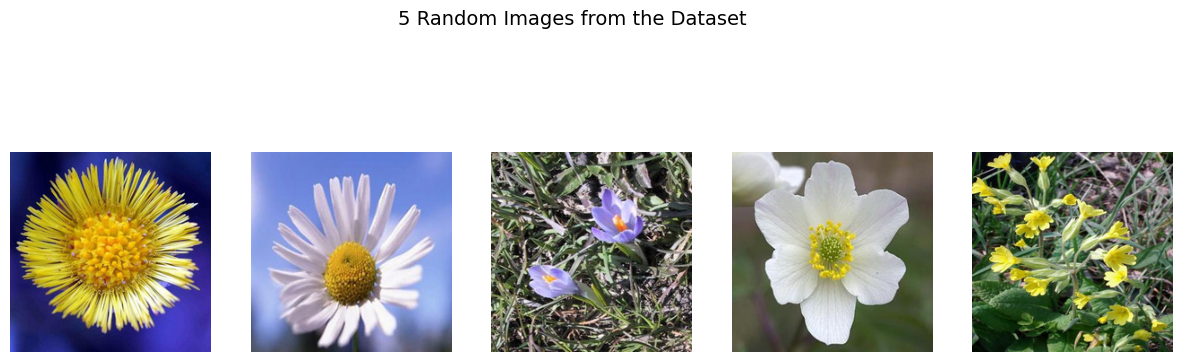

In [ ]:
import matplotlib.pyplot as plt
import random

# Select 5 Random Images
random_indices = random.sample(range(len(X)), 5)
random_images = X[random_indices]

# Display the Random Images
plt.figure(figsize=(15, 5))

for i, img in enumerate(random_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)  # Display image
    plt.axis("off")  # Hide axis

plt.suptitle("5 Random Images from the Dataset", fontsize=14)
plt.show()


__________________________________________________________________________________________

**B. Select any image from the dataset and assign it to a variable. [1 Marks]**

In [ ]:
import random

# Select a Random Image
selected_index = random.randint(0, len(X) - 1)  # Randomly select an index
selected_image = X[selected_index]  # Assign image to a variable

# Display Confirmation
print(f"✅ Selected Image Assigned to Variable: 'selected_image'")
print(f"🔹 Image Index: {selected_index}")
print(f"🔹 Image Shape: {selected_image.shape}")  # (Hei


✅ Selected Image Assigned to Variable: 'selected_image'
🔹 Image Index: 213
🔹 Image Shape: (224, 224, 3)


________________________________________________________________________________________

**C. Transform the image into grayscale format and display the same. [3 Marks]**

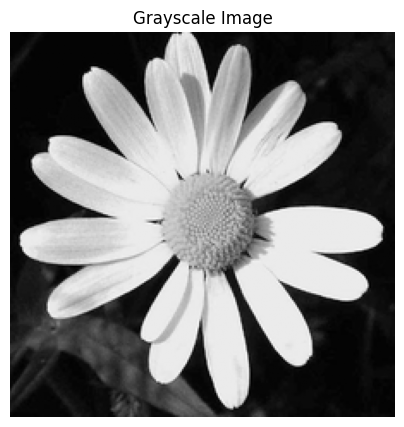

✅ Grayscale Image Shape: (224, 224)


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Convert the Selected Image to Grayscale
selected_image_gray = cv2.cvtColor(selected_image, cv2.COLOR_RGB2GRAY)

# Display the Grayscale Image
plt.figure(figsize=(5, 5))
plt.imshow(selected_image_gray, cmap="gray")  # Display image in grayscale
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Confirm Shape Change
print(f"✅ Grayscale Image Shape: {selected_image_gray.shape}")  # Should be (Height, Width) without channels


_________________________________________________________________________________________

**D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]**

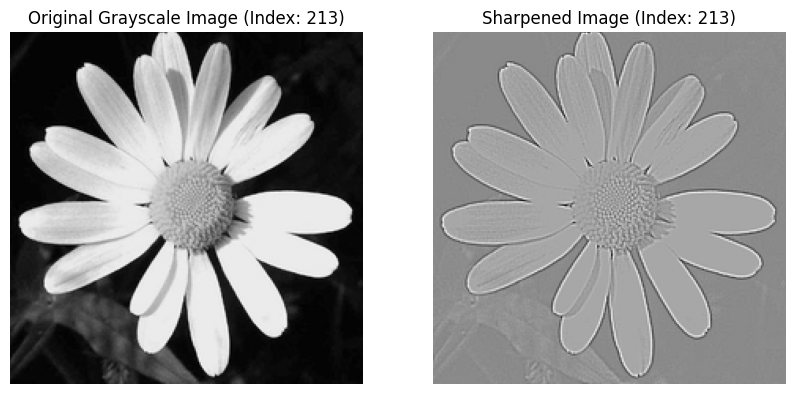

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ✅ Step 1: Select the Image at Index 213
selected_index = 213
selected_image = X[selected_index]

# ✅ Step 2: Convert to Grayscale
selected_image_gray = cv2.cvtColor(selected_image, cv2.COLOR_RGB2GRAY)

# ✅ Step 3: Define Sharpening Kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# ✅ Step 4: Apply Sharpening Filter
sharpened_image = cv2.filter2D(selected_image_gray, -1, sharpening_kernel)

# ✅ Step 5: Display the Original and Sharpened Images
plt.figure(figsize=(10, 5))

# Original Grayscale Image
plt.subplot(1, 2, 1)
plt.imshow(selected_image_gray, cmap="gray")
plt.title("Original Grayscale Image (Index: 213)")
plt.axis("off")

# Sharpened Image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened Image (Index: 213)")
plt.axis("off")

plt.show()

# ✅ Confirm Sha


________________________________________________________________________________________

**E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]**

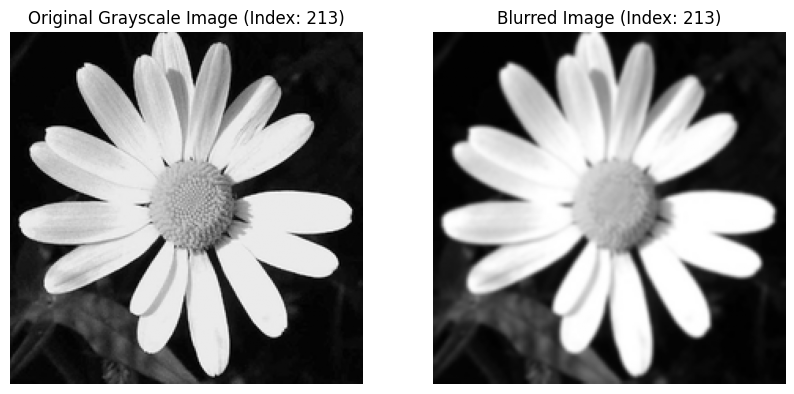

✅ Blurred Image Shape: (224, 224)


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ✅ Step 1: Select the Image at Index 213
selected_index = 213
selected_image = X[selected_index]

# ✅ Step 2: Convert to Grayscale
selected_image_gray = cv2.cvtColor(selected_image, cv2.COLOR_RGB2GRAY)

# ✅ Step 3: Apply Gaussian Blur Filter
blurred_image = cv2.GaussianBlur(selected_image_gray, (5, 5), 0)  # (5,5) kernel size

# ✅ Step 4: Display the Original and Blurred Images
plt.figure(figsize=(10, 5))

# Original Grayscale Image
plt.subplot(1, 2, 1)
plt.imshow(selected_image_gray, cmap="gray")
plt.title("Original Grayscale Image (Index: 213)")
plt.axis("off")

# Blurred Image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap="gray")
plt.title("Blurred Image (Index: 213)")
plt.axis("off")

plt.show()

# ✅ Confirm Shape of the Blurred Image
print(f"✅ Blurred Image Shape: {blurred_image.shape}")  # Should be (224, 224) same as original


___________________________________________________________________________________________

**F. Display all the 4 images from above questions besides each other to observe the difference. [1 Mark]**

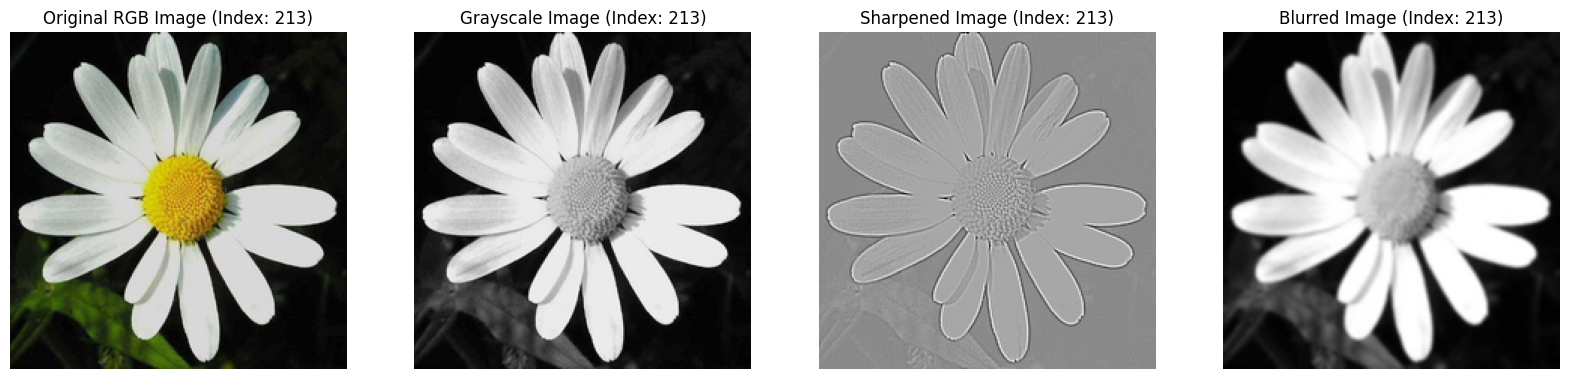

✅ Displayed all 4 images side by side for comparison.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ✅ Step 1: Select the Image at Index 213
selected_index = 213
selected_image = X[selected_index]

# ✅ Step 2: Convert to Grayscale
selected_image_gray = cv2.cvtColor(selected_image, cv2.COLOR_RGB2GRAY)

# ✅ Step 3: Apply Sharpening Filter
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened_image = cv2.filter2D(selected_image_gray, -1, sharpening_kernel)

# ✅ Step 4: Apply Blurring Filter
blurred_image = cv2.GaussianBlur(selected_image_gray, (5, 5), 0)  # (5,5) kernel size

# ✅ Step 5: Display All Images Side by Side
plt.figure(figsize=(20, 5))

# Original Color Image
plt.subplot(1, 4, 1)
plt.imshow(selected_image)
plt.title("Original RGB Image (Index: 213)")
plt.axis("off")

# Original Grayscale Image
plt.subplot(1, 4, 2)
plt.imshow(selected_image_gray, cmap="gray")
plt.title("Grayscale Image (Index: 213)")
plt.axis("off")

# Sharpened Image
plt.subplot(1, 4, 3)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened Image (Index: 213)")
plt.axis("off")

# Blurred Image
plt.subplot(1, 4, 4)
plt.imshow(blurred_image, cmap="gray")
plt.title("Blurred Image (Index: 213)")
plt.axis("off")

plt.show()

print("✅ Displayed all 4 images side by side for comparison.")


_________________________________________________________________________________________

##**3. Model training and Tuning: [15 Marks]**

**A. Split the data into train and test with 80:20 proportion. [2 Marks]**

In [ ]:
from sklearn.model_selection import train_test_split

# ✅ Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y  # Stratify ensures balanced class distribution
)

# ✅ Display the shapes of the train and test sets
print(f"✅ X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")


✅ X_train shape: (1088, 224, 224, 3), Y_train shape: (1088, 17)
✅ X_test shape: (272, 224, 224, 3), Y_test shape: (272, 17)


________________________________________________________________________________________

**B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Define the CNN Model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Get Input Shape and Number of Classes
input_shape = X_train.shape[1:]  # (224, 224, 3)
num_classes = Y_train.shape[1]  # 17 classes for the Oxford 17 dataset

# ✅ Create and Train the Model
cnn_model = create_cnn_model(input_shape, num_classes)

EPOCHS = 10
BATCH_SIZE = 32

history = cnn_model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

# ✅ Save the Model
cnn_model.save("flower_classifier_model.keras")

print("✅ Model training completed!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - accuracy: 0.0717 - loss: 3.7297 - val_accuracy: 0.1949 - val_loss: 2.5996
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 204s 5s/step - accuracy: 0.1864 - loss: 2.4765 - val_accuracy: 0.2794 - val_loss: 2.1653
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 205s 5s/step - accuracy: 0.2955 - loss: 2.1777 - val_accuracy: 0.3640 - val_loss: 1.9113
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.4429 - loss: 1.7217 - val_accuracy: 0.4669 - val_loss: 1.6371
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 213s 5s/step - accuracy: 0.5321 - loss: 1.3887 - val_accuracy: 0.5331 - val_loss: 1.4916
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 196s 5s/step - accuracy: 0.6457 - loss: 1.0949 - val_accuracy: 0.5221 - val_loss: 1.5149
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 199s 5s/step - accuracy: 0.6828 - loss: 0.8821 - val_accuracy: 0.5184 - val_loss: 1.5956
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - accuracy: 0.7602 - loss: 0.7032 - val_accuracy: 0.5625 - v

____________________________________________________________________________________________

**C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# ✅ Define the Neural Network Model
def create_nn_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),  # Flatten 2D images into 1D feature vector
        Dense(512, activation='relu'),  # Fully connected layer with 512 neurons
        Dropout(0.5),  # Dropout to reduce overfitting
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Get Input Shape and Number of Classes
input_shape = X_train.shape[1:]  # (224, 224, 3)
num_classes = Y_train.shape[1]  # 17 classes for the Oxford 17 dataset

# ✅ Create and Train the Model
nn_model = create_nn_model(input_shape, num_classes)

EPOCHS = 10
BATCH_SIZE = 32

history_nn = nn_model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

# ✅ Save the Model
nn_model.save("flower_nn_model.keras")

print("✅ Neural Network Model Training Completed!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.0757 - loss: 75.9031 - val_accuracy: 0.0809 - val_loss: 2.8101
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.0606 - loss: 2.9726 - val_accuracy: 0.0588 - val_loss: 2.8336
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.0633 - loss: 2.8507 - val_accuracy: 0.0588 - val_loss: 2.8332
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.0585 - loss: 2.8431 - val_accuracy: 0.0588 - val_loss: 2.8331
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.0567 - loss: 2.8355 - val_accuracy: 0.0588 - val_loss: 2.8333
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.0544 - loss: 2.8420 - val_accuracy: 0.0588 - val_loss: 2.8333
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.0515 - loss: 2.8339 - val_accuracy: 0.0588 - val_loss: 2.8333
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.0598 - loss: 2.8335 - val_accuracy: 0.0588 - val_loss

______________________________________________________________________________________

**D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Define a Basic CNN Model
def create_basic_cnn(input_shape, num_classes):
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten the feature maps
        Flatten(),

        # Fully Connected Layer
        Dense(128, activation='relu'),
        Dropout(0.5),

        # Output Layer
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Get Input Shape and Number of Classes
input_shape = X_train.shape[1:]  # (224, 224, 3)
num_classes = Y_train.shape[1]  # 17 classes for the Oxford 17 dataset

# ✅ Create the CNN Model
basic_cnn_model = create_basic_cnn(input_shape, num_classes)

# ✅ Train the Model
EPOCHS = 10
BATCH_SIZE = 32

history_basic_cnn = basic_cnn_model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

# ✅ Evaluate Model Performance on Test Data
test_loss, test_accuracy = basic_cnn_model.evaluate(X_test, Y_test, verbose=1)

print(f"✅ Basic CNN Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✅ Basic CNN Test Loss: {test_loss:.4f}")

# ✅ Save the Model
basic_cnn_model.save("basic_flower_cnn_model.keras")

print("✅ Basic CNN Model Training Completed!")


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.0958 - loss: 7.2001 - val_accuracy: 0.1360 - val_loss: 2.6568
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.1382 - loss: 2.6166 - val_accuracy: 0.2169 - val_loss: 2.3965
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.2282 - loss: 2.3297 - val_accuracy: 0.3493 - val_loss: 2.0598
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.3787 - loss: 1.9201 - val_accuracy: 0.4596 - val_loss: 1.7340
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.5021 - loss: 1.5006 - val_accuracy: 0.4853 - val_loss: 1.5485
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.6034 - loss: 1.2037 - val_accuracy: 0.4963 - val_loss: 1.5450
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.7198 - loss: 0.8420 - val_accuracy: 0.5699 - val_loss: 1.3698
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.7637 - loss: 0.7286 - val_accuracy: 0.5662 - v

______________________________________________________________________________________

**E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]**

There is no file named Prediction.jpg in the provided datasets. so unable to complete this question.

# End of Project



